In [6]:
%matplotlib inline
from preamble import *

In [7]:
X, y = mglearn.datasets.make_forge()

In [12]:
print(X)

[[  9.963   4.597]
 [ 11.033  -0.168]
 [ 11.542   5.211]
 [  8.693   1.543]
 [  8.106   4.287]
 [  8.31    4.806]
 [ 11.93    4.649]
 [  9.673  -0.203]
 [  8.348   5.134]
 [  8.675   4.476]
 [  9.177   5.093]
 [ 10.24    2.455]
 [  8.689   1.487]
 [  8.922  -0.64 ]
 [  9.491   4.332]
 [  9.257   5.133]
 [  7.998   4.853]
 [  8.184   1.296]
 [  8.734   2.492]
 [  9.323   5.098]
 [ 10.064   0.991]
 [  9.5    -0.264]
 [  8.345   1.638]
 [  9.502   1.938]
 [  9.151   5.498]
 [ 11.564   1.339]]


In [14]:
print(X[:, 0])

[  9.963  11.033  11.542   8.693   8.106   8.31   11.93    9.673   8.348
   8.675   9.177  10.24    8.689   8.922   9.491   9.257   7.998   8.184
   8.734   9.323  10.064   9.5     8.345   9.502   9.151  11.564]


In [15]:
print(y)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


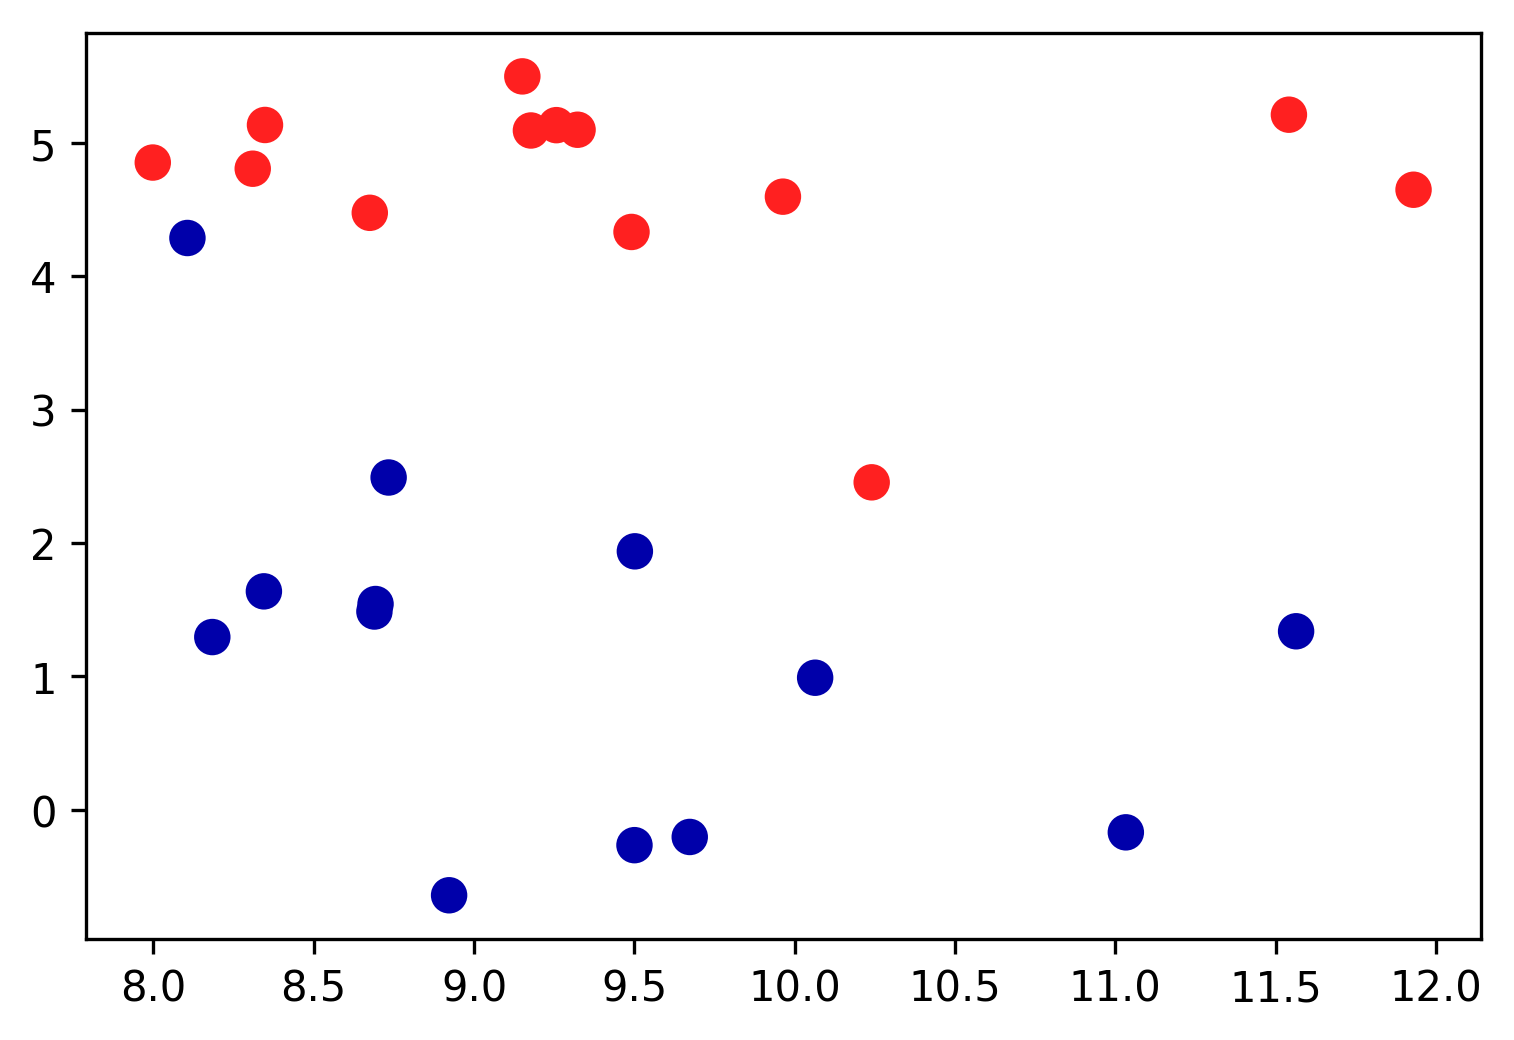

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)

In [33]:
X2, y2 = mglearn.datasets.make_wave(n_samples=40)

In [25]:
print(X2, y2)

(array([[-0.753],
       [ 2.704],
       [ 1.392],
       [ 0.592],
       [-2.064],
       [-2.064],
       [-2.651],
       [ 2.197],
       [ 0.607],
       [ 1.248],
       [-2.876],
       [ 2.819],
       [ 1.995],
       [-1.726],
       [-1.909],
       [-1.9  ],
       [-1.175],
       [ 0.149],
       [-0.408],
       [-1.253],
       [ 0.671],
       [-2.163],
       [-1.247],
       [-0.802],
       [-0.264],
       [ 1.711],
       [-1.802],
       [ 0.085],
       [ 0.554],
       [-2.721],
       [ 0.645],
       [-1.977],
       [-2.61 ],
       [ 2.693],
       [ 2.794],
       [ 1.85 ],
       [-1.172],
       [-2.414],
       [ 1.105],
       [-0.359]]), array([-0.448,  0.331,  0.779,  0.035, -1.388, -2.472, -1.527,  1.494,
        1.   ,  0.23 , -1.06 ,  0.779,  0.754, -1.514, -1.673, -0.905,
        0.084, -0.527, -0.541, -0.341,  0.218, -1.125,  0.373,  0.098,
       -0.986,  0.967, -1.135,  0.698,  0.437, -0.957,  0.035, -2.086,
       -0.474,  1.537,  0.869,  1

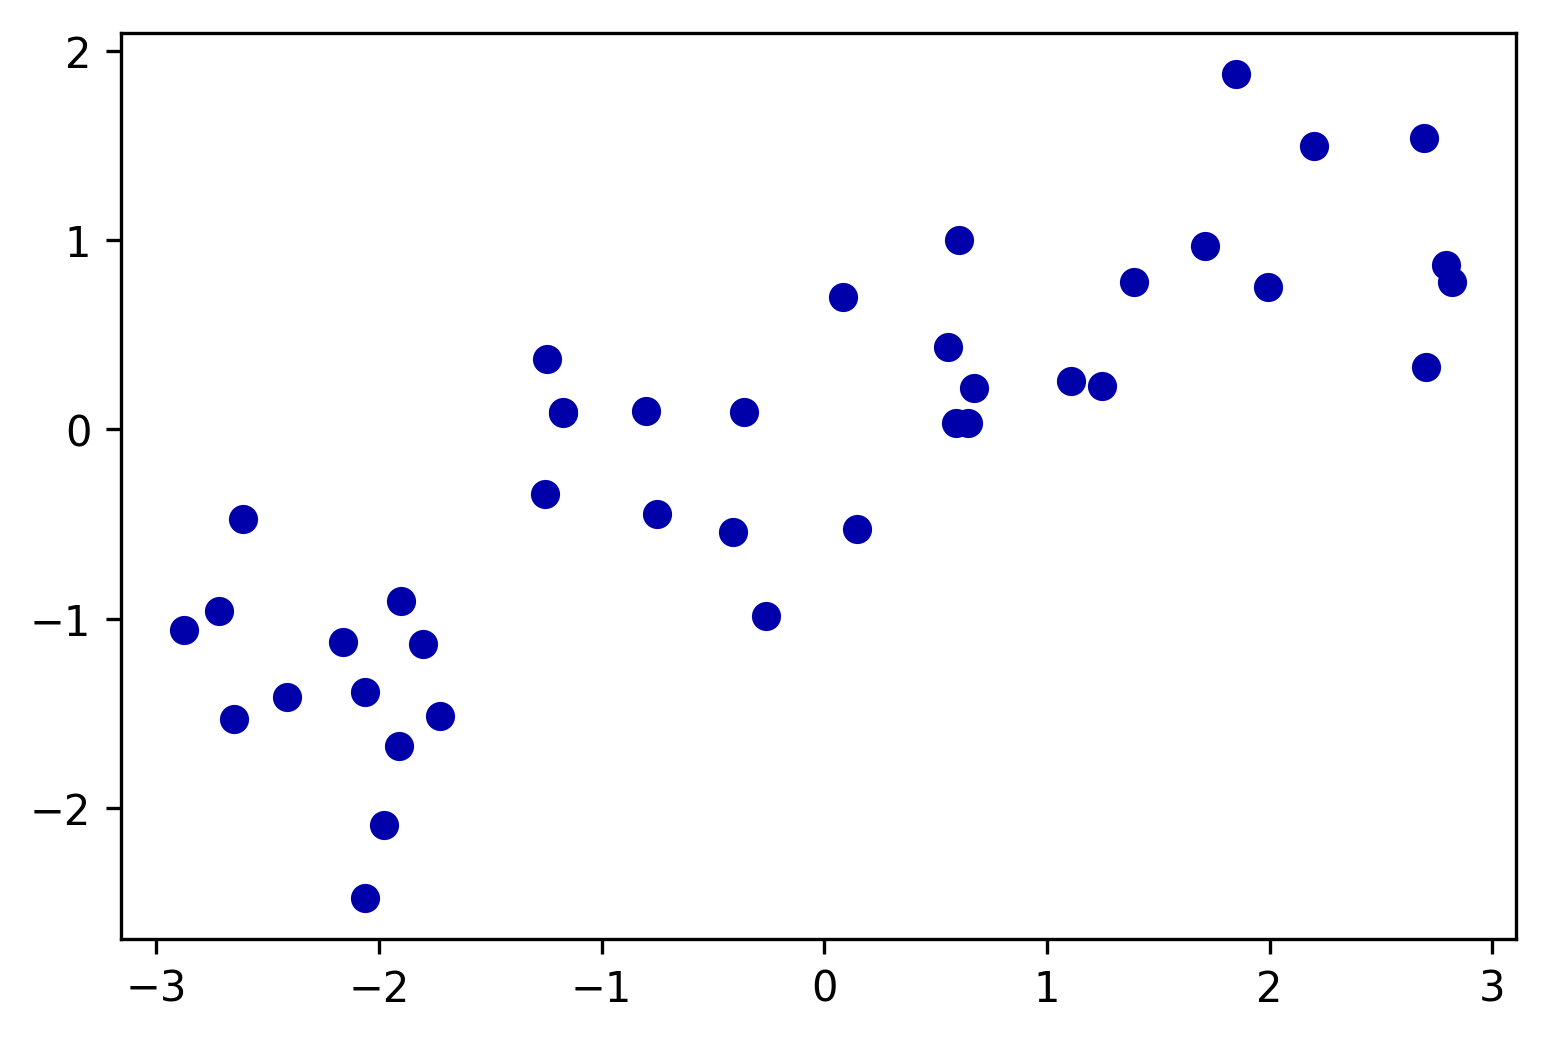

In [53]:
plt.plot(X2, y2, 'o')

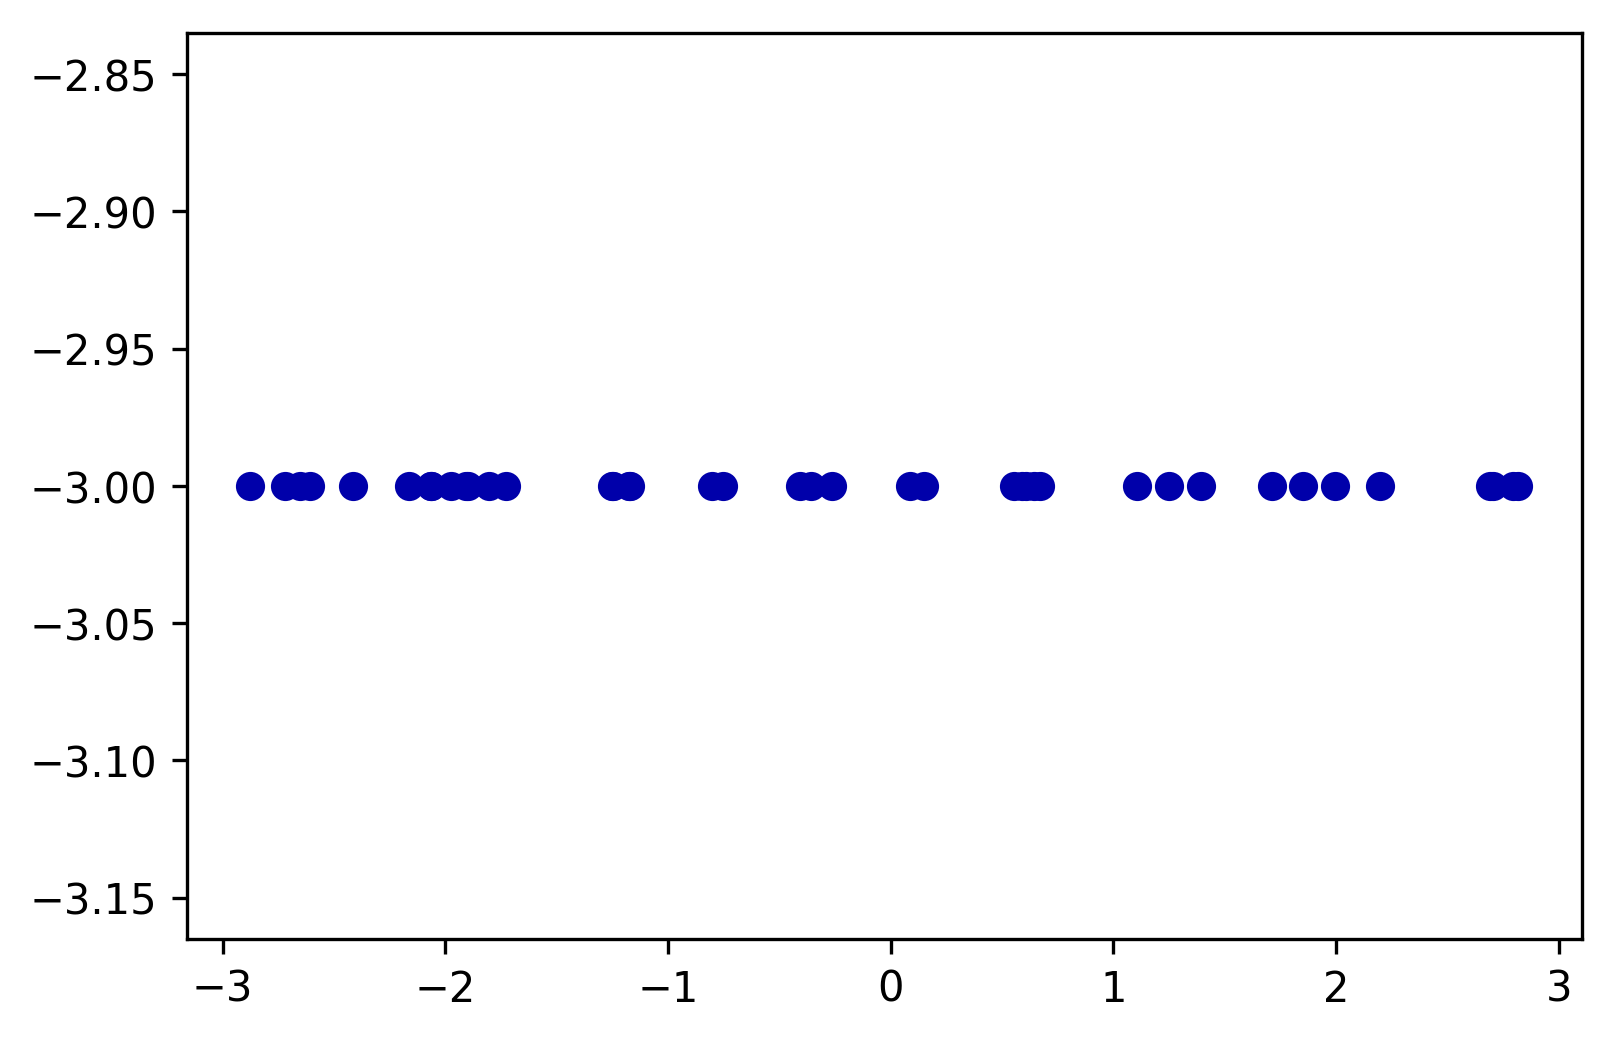

In [35]:
plt.plot(X2, -3 * np.ones(len(X2)), 'o')

### Using KNN Model on our mock data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#1. Load data
X, y = mglearn.datasets.make_forge()

In [56]:
#2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
#3. instantiate our model
clf = KNeighborsClassifier(n_neighbors=3)

In [59]:
#4. Train our model using .fit()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [60]:
#5. Test our model using .predict()
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [61]:
#6. Evaluate our model using .score()
clf.score(X_test, y_test)

0.8571428571428571

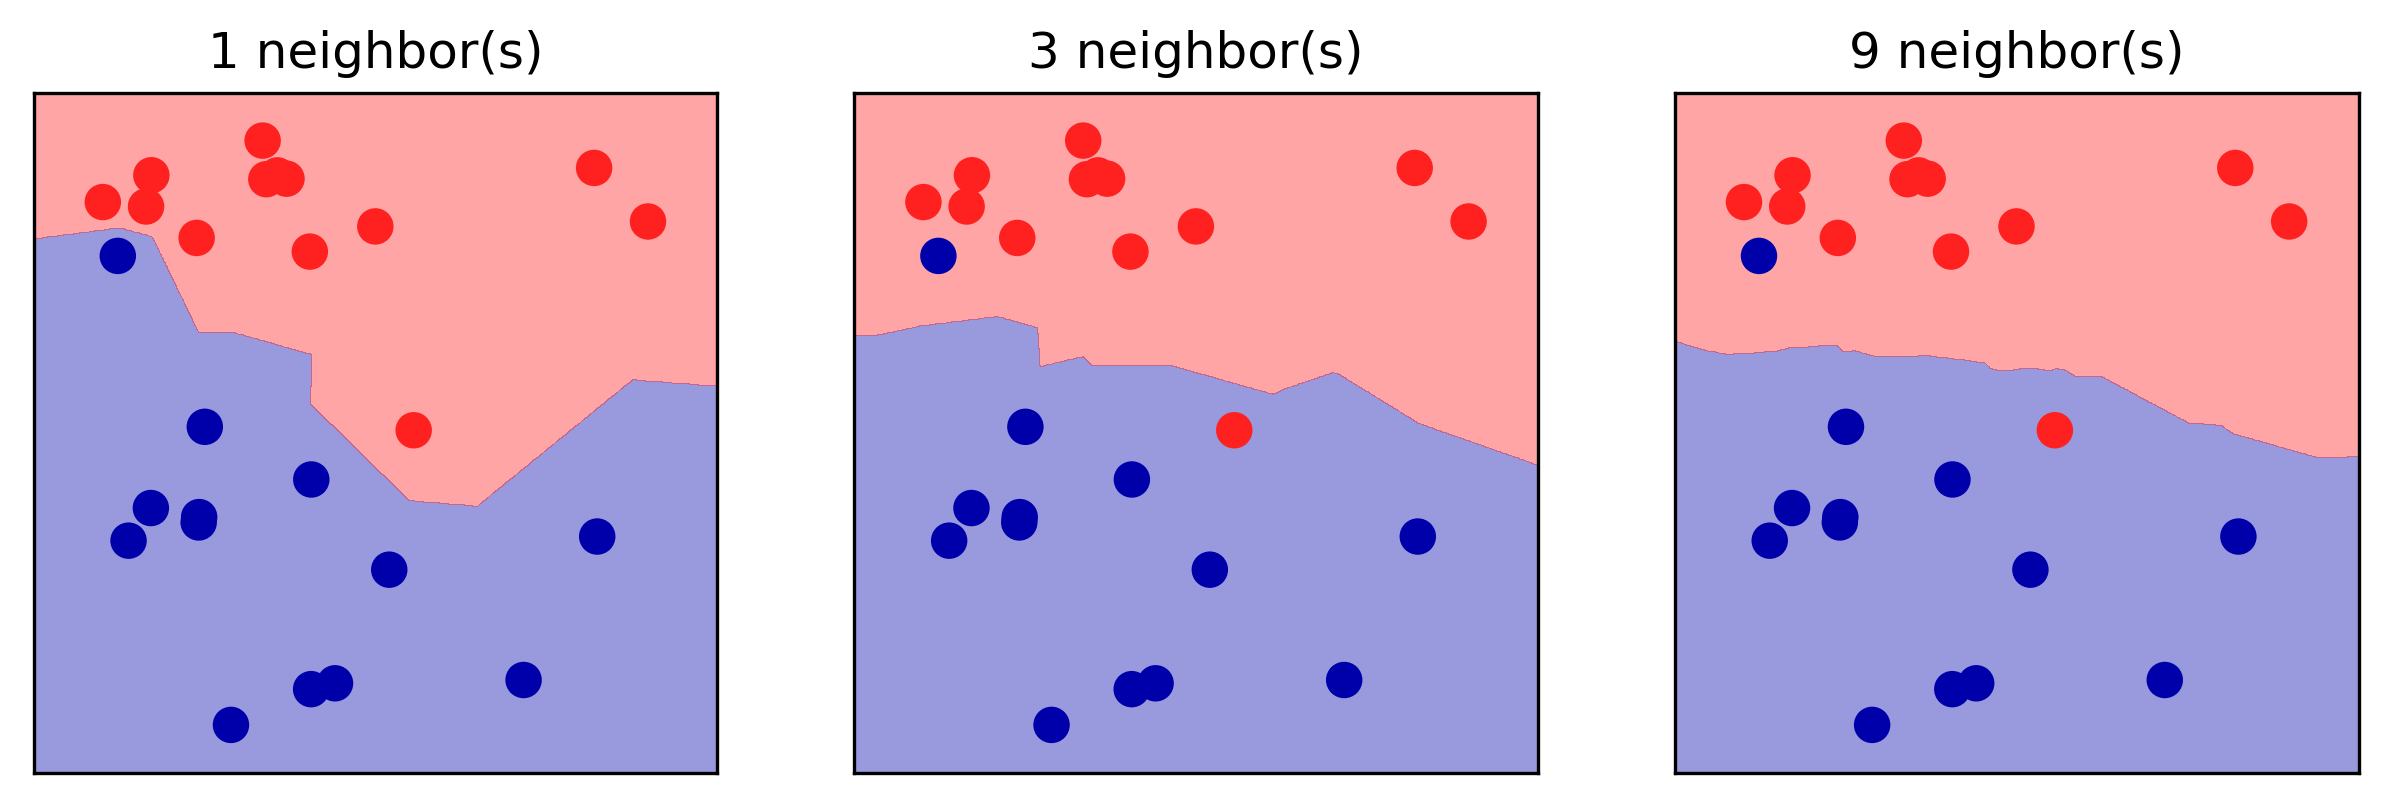

In [62]:
# 7. Visualising the boundaries
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)

### Experimenting with real data

We use the Wisconsin breast cancer dataset, which records clinical measurements of breast cancer tumours. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measure‐ ments of the tissue. 

In [37]:
from sklearn.datasets import load_breast_cancer

In [39]:
cancer = load_breast_cancer()
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [40]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [44]:
np.bincount(cancer.target)
# Of these 569 data points, 212 are labeled as malignant, and 357 as benign

array([212, 357])

In [45]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

### Splitting the data into train and test

In [46]:
from sklearn.model_selection import train_test_split

In [65]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(cancer['data'], cancer['target'], random_state = 0)

In [67]:
print(X_train_cancer.shape)
print(X_test_cancer.shape)
print(y_train_cancer.shape)
print(y_test_cancer.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
cancer_knn_model = KNeighborsClassifier(n_neighbors=3)

In [68]:
cancer_knn_model.fit(X_train_cancer, y_train_cancer)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [70]:
cancer_knn_model.predict(X_test_cancer)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0])

In [72]:
cancer_knn_model.score(X_test_cancer, y_test_cancer)

0.92307692307692313

# Further evaluating our model

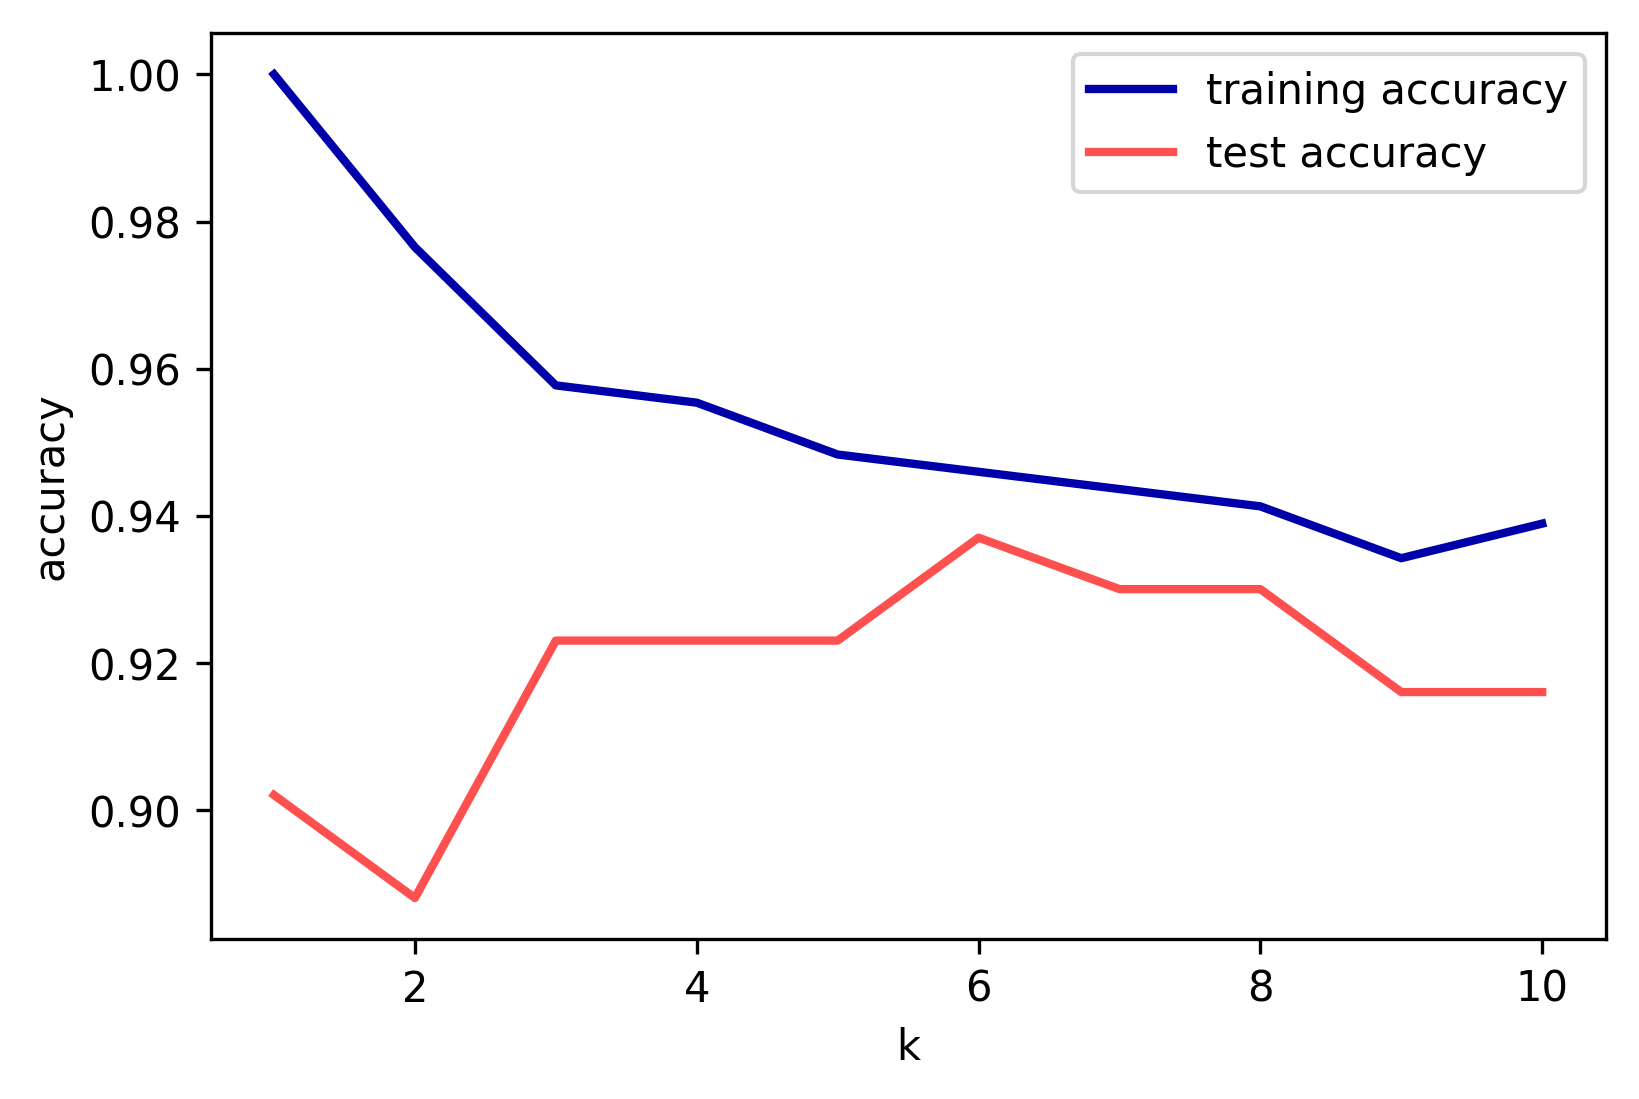

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("k")
plt.legend()

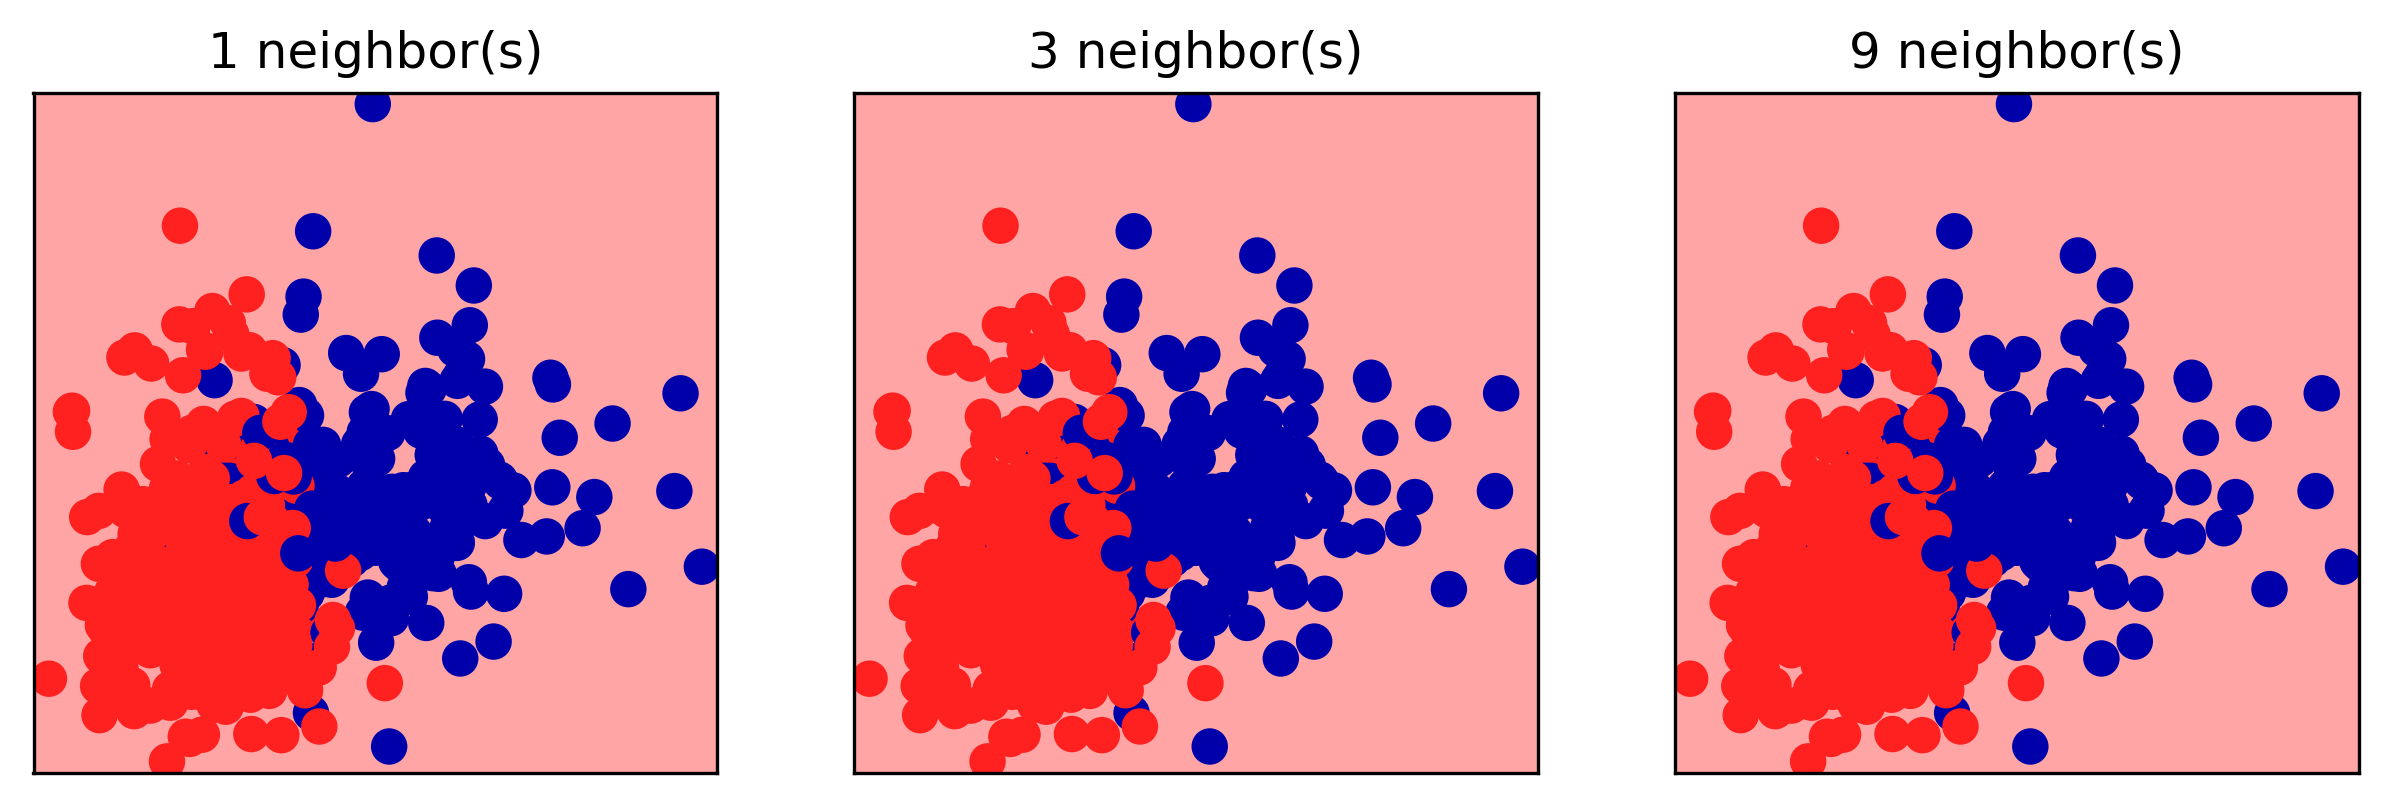

In [80]:
X = cancer['data']
y = cancer['target']
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    cancer_knn_model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)